# Q3 - Assignment 9 | ME7223
## Saarthak Marathe - ME17B162

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, solve
from scipy.optimize import minimize
import scipy
import math
import matplotlib.pyplot as plt

In [21]:
def f(x):
    return (x-1)**2

def g1(x):
    return 2-x

def g2(x):
    return x-4

def diff_f(x):
    return 2*(x-1)

def penalty_ext(x, k):
    term = max(0, g1(x))**2 + max(0,g2(x))**2
    return f(x) + k*term

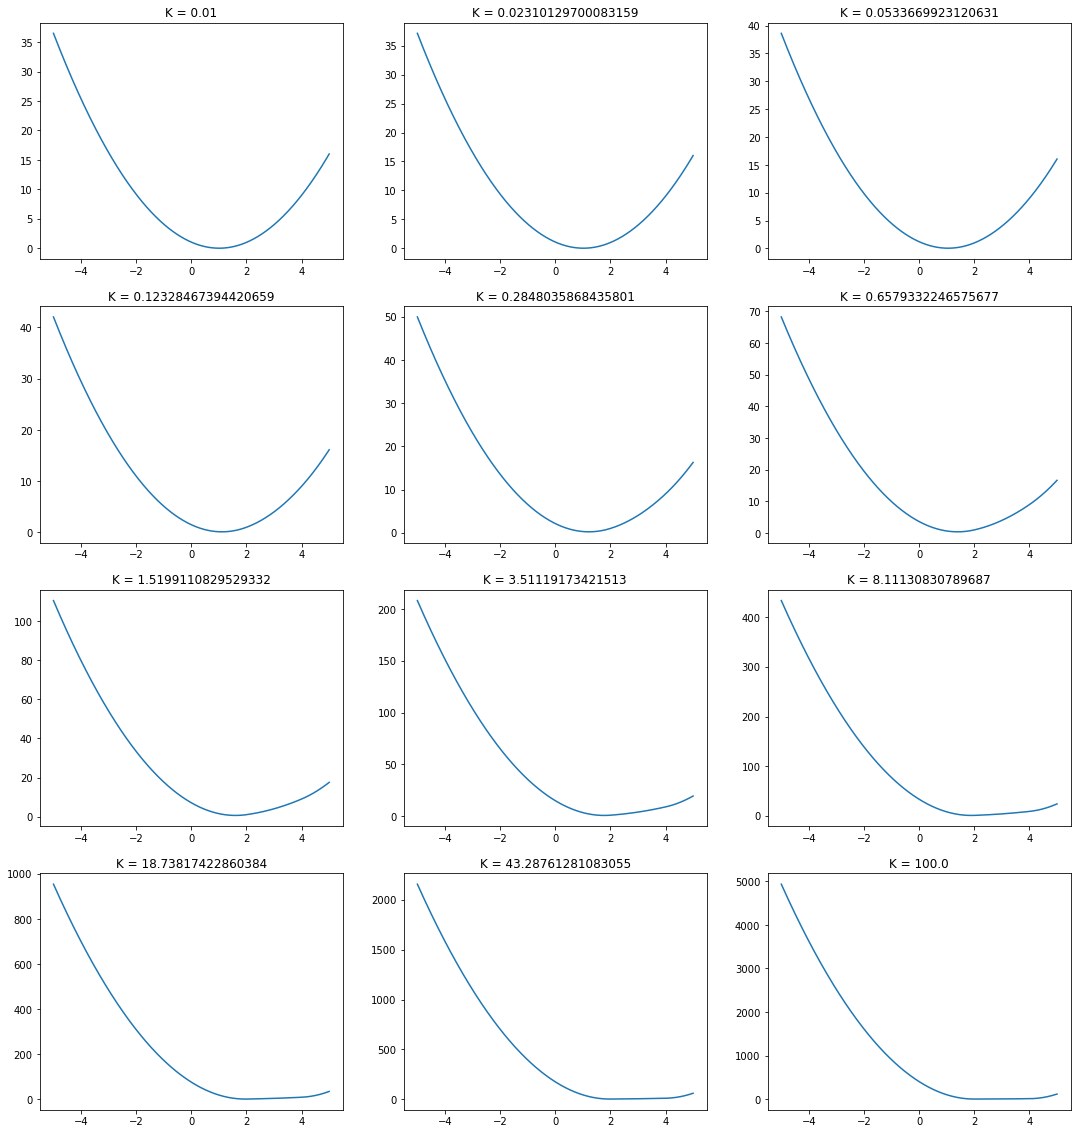

In [24]:
xmin = -5
xmax = 5
x = np.linspace(xmin, xmax, 600)

arr = np.linspace(-10, 10,12)
k_arr = 10**(0.2*arr)
k_arr = np.reshape(k_arr, (4,3))

fig = plt.figure(figsize=(25, 20))
for i in range(k_arr.shape[0]):
    for j in range(k_arr.shape[1]):
        y = np.array([penalty_ext(xi,k_arr[i,j]) for xi in x]).reshape(x.shape)
        fig.add_subplot(4, 4, 4*i + j + 1)
        plt.plot(x,y)
        plt.title('K = '+ str(k_arr[i,j]))
plt.show()

Normal graph doesn't give conclusive results as all of them converge finally with similar slop. To better understand the graphs, we take a semilog graph as shown below.

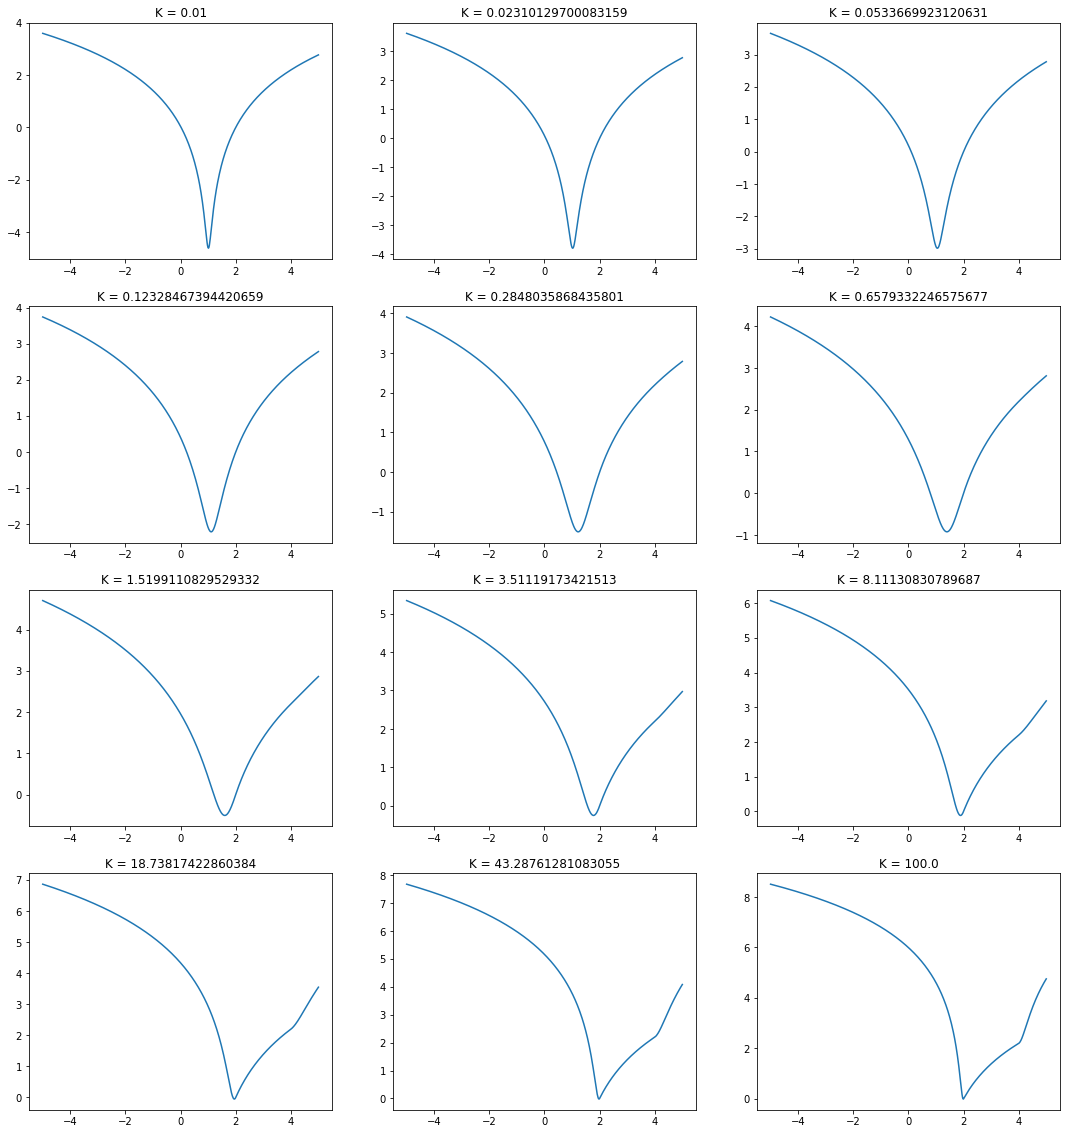

In [25]:
fig = plt.figure(figsize=(25, 20))
for i in range(k_arr.shape[0]):
    for j in range(k_arr.shape[1]):
        y = np.array([penalty_ext(xi,k_arr[i,j]) for xi in x]).reshape(x.shape)
        fig.add_subplot(4, 4, 4*i + j + 1)
        plt.plot(x,np.log(y))
        plt.title('K = '+ str(k_arr[i,j]))
plt.show()

From this we can see that, k=100 gives the sharpest change with steepest slope near the minimal and thus we take k=100 as the initial value. And we take k amp as 5.

In [30]:
x = 3
print(0, '- Coordinate:', x, '- Objective Function:', f(x))
i = 0
max_iter = 10
eps = 2e-5
err = abs(diff_f(x))
k = 100
k_amp = 5
penalty_f = lambda x: penalty_ext(x, k)

while err > eps and i<max_iter:
    residual = minimize(penalty_f, x)
    x_new = residual['x']
    x = x_new
    err = abs(diff_f(x))
    i =i+1
    k = k_amp * k
    print(i, '- Coordinate:', x, '- Objective Function:', f(x))

0 - Coordinate: 3 - Objective Function: 4
1 - Coordinate: [1.990099] - Objective Function: [0.98029604]
2 - Coordinate: [1.99800399] - Objective Function: [0.99601196]
3 - Coordinate: [1.99960015] - Objective Function: [0.99920047]
4 - Coordinate: [1.99992] - Objective Function: [0.99984]
5 - Coordinate: [1.99998399] - Objective Function: [0.99996799]
6 - Coordinate: [1.9999968] - Objective Function: [0.9999936]
7 - Coordinate: [1.99999936] - Objective Function: [0.99999872]
8 - Coordinate: [1.99999987] - Objective Function: [0.99999974]
9 - Coordinate: [1.99999997] - Objective Function: [0.99999994]
10 - Coordinate: [2.] - Objective Function: [0.99999999]
